# Phase 1 : Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("train.csv")
test =  pd.read_csv("test.csv")

In [9]:
train.info()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              2029 non-null   int64 
 1   body                2029 non-null   object
 2   rule                2029 non-null   object
 3   subreddit           2029 non-null   object
 4   positive_example_1  2029 non-null   object
 5   positive_example_2  2029 non-null   object
 6   negative_example_1  2029 non-null   object
 7   negative_example_2  2029 non-null   object
 8   rule_violation      2029 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 142.8+ KB


(2029, 9)

In [10]:
test.info()
test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              10 non-null     int64 
 1   body                10 non-null     object
 2   rule                10 non-null     object
 3   subreddit           10 non-null     object
 4   positive_example_1  10 non-null     object
 5   positive_example_2  10 non-null     object
 6   negative_example_1  10 non-null     object
 7   negative_example_2  10 non-null     object
dtypes: int64(1), object(7)
memory usage: 772.0+ bytes


(10, 8)

### On comparing train and test datasets we can conclude that "rule_violation" is the output(Y) required and "rule" and "body" are the inputs(X) to be considered while training the model.  

In [11]:
train.isna().sum()

row_id                0
body                  0
rule                  0
subreddit             0
positive_example_1    0
positive_example_2    0
negative_example_1    0
negative_example_2    0
rule_violation        0
dtype: int64

In [12]:
test.isna().sum()

row_id                0
body                  0
rule                  0
subreddit             0
positive_example_1    0
positive_example_2    0
negative_example_1    0
negative_example_2    0
dtype: int64

In [14]:
train.dtypes

row_id                 int64
body                  object
rule                  object
subreddit             object
positive_example_1    object
positive_example_2    object
negative_example_1    object
negative_example_2    object
rule_violation         int64
dtype: object

In [15]:
test.dtypes

row_id                 int64
body                  object
rule                  object
subreddit             object
positive_example_1    object
positive_example_2    object
negative_example_1    object
negative_example_2    object
dtype: object

In [17]:
train.duplicated().sum()

np.int64(0)

In [18]:
test.duplicated().sum()

np.int64(0)

In [19]:
train["rule"].value_counts(normalize=True)

rule
No legal advice: Do not offer or request legal advice.                                                     0.501232
No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.    0.498768
Name: proportion, dtype: float64

In [20]:
train["rule_violation"].value_counts(normalize=True)

rule_violation
1    0.508132
0    0.491868
Name: proportion, dtype: float64

## Let's create Text-based numeric features :

In [24]:
train['char_count'] = train['body'].str.len()
train['word_count'] = train['body'].str.split().apply(len)
train['avg_word_len'] = train['char_count'] / train['word_count']
train['num_exclaims'] = train['body'].str.count('!')
train['num_questions'] = train['body'].str.count('\?')
train['num_caps'] = train['body'].str.findall(r'[A-Z]').apply(len)
train['num_digits'] = train['body'].str.count('\d')
train['num_urls'] = train['body'].str.count('http[s]?://')
train['num_mentions'] = train['body'].str.count('@')
train['num_hashtags'] = train['body'].str.count('#')

In [28]:
train.groupby("rule_violation")[[
    'char_count', 'word_count', 'avg_word_len',
    'num_exclaims', 'num_questions', 'num_caps',
    'num_digits', 'num_urls', 'num_mentions', 'num_hashtags'
]].mean().T


rule_violation,0,1
char_count,157.588176,195.481086
word_count,23.134269,32.637245
avg_word_len,9.174216,7.092692
num_exclaims,0.228457,0.281280
num_questions,0.292585,0.272551
num_caps,8.191383,7.843841
num_digits,2.900802,2.775946
num_urls,0.592184,0.365664
num_mentions,0.012024,0.018429
num_hashtags,0.044088,0.061106


## Parameter's to check for :

1.) Are violating comments longer?
-------- Yes ---------

2.) Do they have more exclamation marks?
-------- Yes ---------

3.) Do they contain more uppercase letters (shouting)?
-------- No ----------

4.) Do the violating comments contain more URLs (possibly spam)?
-------- No ----------

In [31]:
rule_violation_by_rule = train.groupby("rule")["rule_violation"].value_counts(normalize=True).unstack()
rule_violation_by_rule.columns = ['Not Violated (0)', 'Violated (1)']
rule_violation_by_rule = rule_violation_by_rule.sort_values("Violated (1)", ascending=False)
rule_violation_by_rule


,Not Violated (0),Violated (1)
rule,,
No legal advice: Do not offer or request legal advice.,0.416912,0.583088
"No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.",0.567194,0.432806


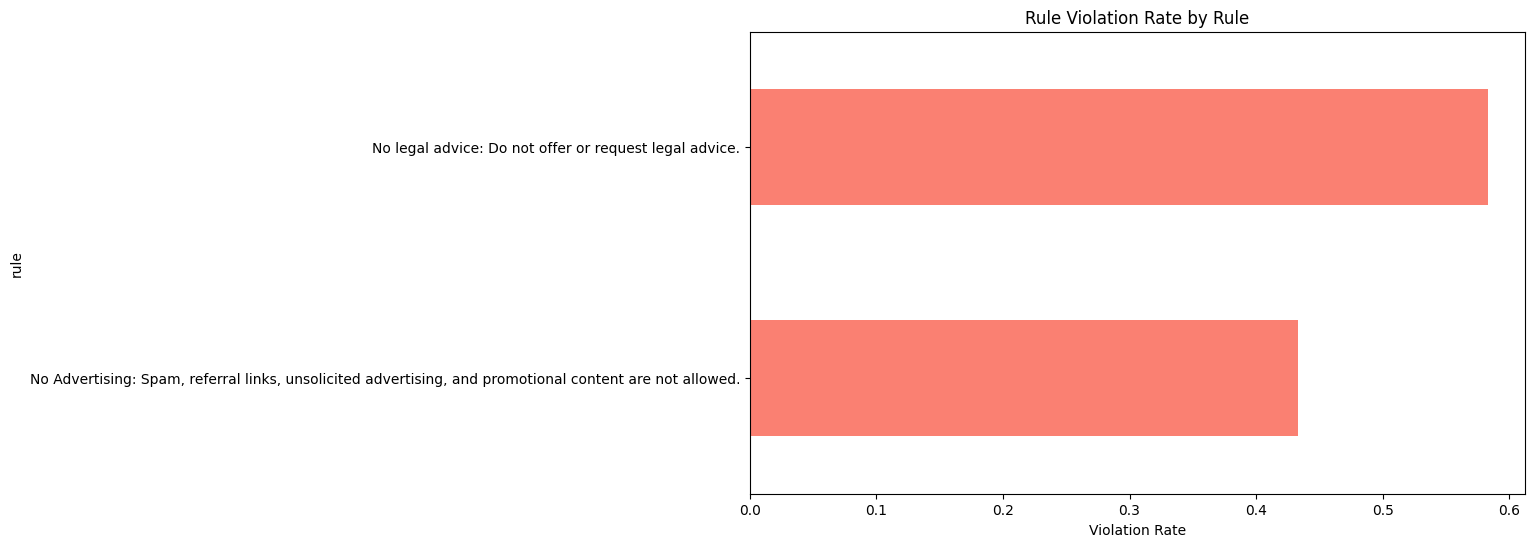

In [32]:
import matplotlib.pyplot as plt

rule_violation_by_rule["Violated (1)"].plot(kind='barh', figsize=(10, 6), color='salmon')
plt.xlabel("Violation Rate")
plt.title("Rule Violation Rate by Rule")
plt.gca().invert_yaxis()
plt.show()
